In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
from welly import Well
import welly
from sqlalchemy import create_engine, MetaData
from base import ROOT_DIR
# from sklearn import preprocessing


In [3]:
file = r"C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\data\Duvernay\Duvernay\Duvernay well headers SPE April 21 2021 .xlsx"
df_well = pd.read_excel(file)
print(df_well.head())

               UWI   Elevation Meters ElevationDatum  TD meters   \
0  100072507623W500             555.7             KB      2545.0   
1  100062007823W500             560.9             KB      2430.0   
2  100052107723W500             558.4             KB      2515.5   
3  100061307518W500             631.4             KB      2411.0   
4  100070907618W500             627.0             KB      2408.0   

   SurfaceLatitude_NAD83  SurfaceLongitude_NAD83  BottomLatitude_NAD83  \
0              55.613640             -117.423800             55.613640   
1              55.770872             -117.537674             55.770872   
2              55.683723             -117.516168             55.683723   
3              55.494600             -116.653606             55.494600   
4              55.566965             -116.726243             55.566965   

   BottomLongitude_NAD83  SurfaceLatitude_NAD27  SurfaceLongitude_NAD27  \
0            -117.423800              55.613640             -117.423800

In [4]:
column_names = df_well.columns
print(column_names)
duvernay_geo = df_well[
    ['UWI ', 'Elevation Meters', 'TD meters ', 'SurfaceLongitude_NAD83',
     'SurfaceLatitude_NAD83',
     ]]
print(duvernay_geo.head())

Index(['UWI ', 'Elevation Meters', 'ElevationDatum', 'TD meters ',
       'SurfaceLatitude_NAD83', 'SurfaceLongitude_NAD83',
       'BottomLatitude_NAD83', 'BottomLongitude_NAD83',
       'SurfaceLatitude_NAD27', 'SurfaceLongitude_NAD27',
       'BottomLatitude_NAD27', 'BottomLongitude_NAD27'],
      dtype='object')
               UWI   Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0  100072507623W500             555.7      2545.0             -117.423800   
1  100062007823W500             560.9      2430.0             -117.537674   
2  100052107723W500             558.4      2515.5             -117.516168   
3  100061307518W500             631.4      2411.0             -116.653606   
4  100070907618W500             627.0      2408.0             -116.726243   

   SurfaceLatitude_NAD83  
0              55.613640  
1              55.770872  
2              55.683723  
3              55.494600  
4              55.566965  


In [5]:
print(df_well.isna().any())

UWI                       False
Elevation Meters          False
ElevationDatum            False
TD meters                 False
SurfaceLatitude_NAD83     False
SurfaceLongitude_NAD83    False
BottomLatitude_NAD83      False
BottomLongitude_NAD83     False
SurfaceLatitude_NAD27     False
SurfaceLongitude_NAD27    False
BottomLatitude_NAD27      False
BottomLongitude_NAD27     False
dtype: bool


In [6]:
gdf = gpd.GeoDataFrame(
    duvernay_geo, crs='epsg:4269', geometry=gpd.points_from_xy
    (duvernay_geo.SurfaceLongitude_NAD83, duvernay_geo.SurfaceLatitude_NAD83))

print(gdf.head())

               UWI   Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0  100072507623W500             555.7      2545.0             -117.423800   
1  100062007823W500             560.9      2430.0             -117.537674   
2  100052107723W500             558.4      2515.5             -117.516168   
3  100061307518W500             631.4      2411.0             -116.653606   
4  100070907618W500             627.0      2408.0             -116.726243   

   SurfaceLatitude_NAD83                     geometry  
0              55.613640  POINT (-117.42380 55.61364)  
1              55.770872  POINT (-117.53767 55.77087)  
2              55.683723  POINT (-117.51617 55.68372)  
3              55.494600  POINT (-116.65361 55.49460)  
4              55.566965  POINT (-116.72624 55.56697)  


In [7]:
gdf = gdf.to_crs(epsg=3857)
print(gdf.head())

               UWI   Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0  100072507623W500             555.7      2545.0             -117.423800   
1  100062007823W500             560.9      2430.0             -117.537674   
2  100052107723W500             558.4      2515.5             -117.516168   
3  100061307518W500             631.4      2411.0             -116.653606   
4  100070907618W500             627.0      2408.0             -116.726243   

   SurfaceLatitude_NAD83                           geometry  
0              55.613640  POINT (-13071557.623 7481883.651)  
1              55.770872  POINT (-13084234.019 7512937.315)  
2              55.683723  POINT (-13081839.982 7495709.772)  
3              55.494600  POINT (-12985820.019 7458455.717)  
4              55.566965  POINT (-12993905.933 7472689.213)  


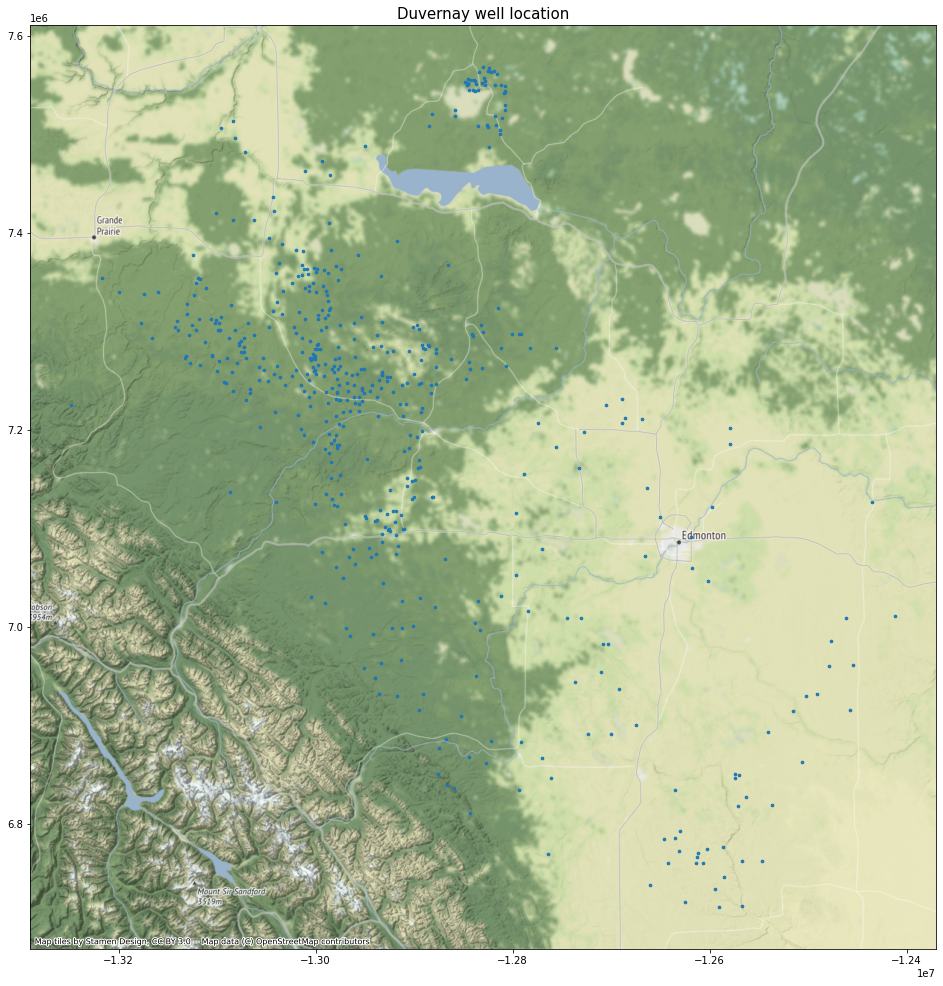

In [10]:
ax = gdf.plot(markersize=7, figsize=(20, 17))
cx.add_basemap(ax)
plt.title("Duvernay well location", fontsize=15)
plt.show()

In [30]:
file = r'C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\data\Duvernay\Duvernay\SPE Duvernay production summary April 20 2021.xlsx'
prod_dvnay = pd.read_excel(file)
print(prod_dvnay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   API                              512 non-null    object        
 1   Measured Depth (ft)              512 non-null    int64         
 2   Total Vertical Depth (ft)        512 non-null    int64         
 3   Spud Date                        512 non-null    datetime64[ns]
 4   Completion Date                  230 non-null    datetime64[ns]
 5   First Production Month           155 non-null    datetime64[ns]
 6   Elevation                        512 non-null    object        
 7   Oil Total Cum (bbl)              155 non-null    float64       
 8   Gas Total Cum (mcf)              155 non-null    float64       
 9   Water Total Cum (bbl)            155 non-null    float64       
 10  GOR Total Average                140 non-null    float64      

In [31]:
print(prod_dvnay.columns)
prod_dvnay_2 = prod_dvnay[['API   ', 'Completion Date   ', 'Oil Total Cum (bbl)   ',
                           'Water Total Cum (bbl)   ', 'Gas Total Cum (mcf)   ',
                           'Spud Date   ', 'Last Production Month   ']]
print(prod_dvnay_2.info())

Index(['API   ', 'Measured Depth (ft)   ', 'Total Vertical Depth (ft)   ',
       'Spud Date   ', 'Completion Date   ', 'First Production Month   ',
       'Elevation   ', 'Oil Total Cum (bbl)   ', 'Gas Total Cum (mcf)   ',
       'Water Total Cum (bbl)   ', 'GOR Total Average   ', 'Plug Date   ',
       'First Production Date   ', 'Elevation Drill Floor (ft)   ',
       'Elevation Ground (ft)   ', 'Elevation Kelly Bushing (ft)   ',
       'Last Production Month   ', 'Gas Maximum (mcf)   ',
       'Gas Maximum Date   ', 'Oil Maximum (bbl)   ', 'Oil Maximum Date   ',
       'Water Maximum (bbl)   ', 'Water Maximum Date   ',
       'Yield Total Average   '],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   API                       512 non-null    object        
 1   Completion Date   

In [32]:
prod_dvnay_2['Liquid_Cum'] = prod_dvnay['Oil Total Cum (bbl)   '] \
                             + prod_dvnay['Water Total Cum (bbl)   ']
print(prod_dvnay_2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   API                       512 non-null    object        
 1   Completion Date           230 non-null    datetime64[ns]
 2   Oil Total Cum (bbl)       155 non-null    float64       
 3   Water Total Cum (bbl)     155 non-null    float64       
 4   Gas Total Cum (mcf)       155 non-null    float64       
 5   Spud Date                 512 non-null    datetime64[ns]
 6   Last Production Month     155 non-null    datetime64[ns]
 7   Liquid_Cum                155 non-null    float64       
dtypes: datetime64[ns](3), float64(4), object(1)
memory usage: 32.1+ KB
None


<ipython-input-32-e7011f26f6a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_dvnay_2['Liquid_Cum'] = prod_dvnay['Oil Total Cum (bbl)   '] \


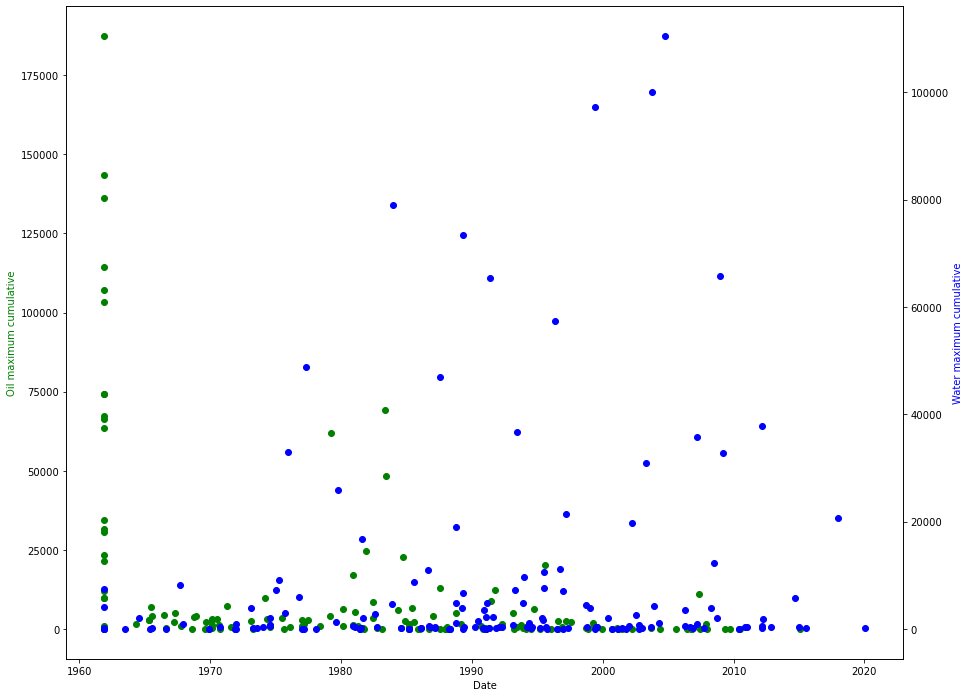

In [33]:
def plot_data(axes, x, y, color, xlabel, ylabel):
    axes.scatter(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)


fig, ax = plt.subplots(figsize=(15, 12))
plot_data(ax, prod_dvnay['Oil Maximum Date   '],
          prod_dvnay['Oil Maximum (bbl)   '], "green", "Date", "Oil maximum cumulative")
ax2 = ax.twinx()
plot_data(ax2, prod_dvnay['Water Maximum Date   '],
          prod_dvnay['Water Maximum (bbl)   '], "blue", "Date",
          "Water maximum cumulative")
plt.show()

In [34]:
gdf_2 = gdf.merge(prod_dvnay_2, how='left', left_on='UWI ', right_on='API   ')
gdf_2.drop('API   ', axis=1, inplace=True)
print(gdf_2.columns)

Index(['UWI ', 'Elevation Meters', 'TD meters ', 'SurfaceLongitude_NAD83',
       'SurfaceLatitude_NAD83', 'geometry', 'Completion Date   ',
       'Oil Total Cum (bbl)   ', 'Water Total Cum (bbl)   ',
       'Gas Total Cum (mcf)   ', 'Spud Date   ', 'Last Production Month   ',
       'Liquid_Cum'],
      dtype='object')


In [ ]:

gpkg_save_path = r"C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\Scripts_gtx\dvnay.gpkg"
gdf_2.to_file(gpkg_save_path, layer="production", driver='GPKG')

# Formation Tops

In [8]:
duvernay_folder = ROOT_DIR / "gtx/data/Duvernay/Duvernay"
dvnay_form_tops = pd.read_excel(duvernay_folder / "Duvernay formation tops SPE April 20 "
                                                 "2021.xlsx")
print(dvnay_form_tops.info())
print(dvnay_form_tops.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   UWI                                                       512 non-null    object 
 1   Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W)  512 non-null    float64
 2   Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W)  512 non-null    float64
 3   Elevation(m above sea level)                              512 non-null    float64
 4   01_Battle (Surbiton)[SSTVD] (m)                           25 non-null     float64
 5   02_Lea_Park (Surbiton)[SSTVD] (m)                         376 non-null    float64
 6   03_1st_White_Speckled_Shale (Surbiton)[SSTVD] (m)         445 non-null    float64
 7   04_2nd_White_Speckled_Shale (Surbiton)[SSTVD] (m)         446 non-null    float64
 8   05_Fish_scales (Surb

In [9]:
# converting to geodataframe
x = dvnay_form_tops['Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W)']
y = dvnay_form_tops['Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W)']
gdf_form_tops = gpd.GeoDataFrame(
    dvnay_form_tops, crs='epsg:4267', geometry=gpd.points_from_xy
    (x, y))
gdf_form_tops.drop(['Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W)', 'Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W)'] , axis=1, inplace=True)
print(gdf_form_tops.info())
gdf_form_tops.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   UWI                                                512 non-null    object  
 1   Elevation(m above sea level)                       512 non-null    float64 
 2   01_Battle (Surbiton)[SSTVD] (m)                    25 non-null     float64 
 3   02_Lea_Park (Surbiton)[SSTVD] (m)                  376 non-null    float64 
 4   03_1st_White_Speckled_Shale (Surbiton)[SSTVD] (m)  445 non-null    float64 
 5   04_2nd_White_Speckled_Shale (Surbiton)[SSTVD] (m)  446 non-null    float64 
 6   05_Fish_scales (Surbiton)[SSTVD] (m)               500 non-null    float64 
 7   06_Mannville_Top (Surbiton)[SSTVD] (m)             501 non-null    float64 
 8   07_Ostracod_Beds (Surbiton)[SSTVD] (m)             379 non-null    float

,UWI,Elevation(m above sea level),01_Battle (Surbiton)[SSTVD] (m),02_Lea_Park (Surbiton)[SSTVD] (m),03_1st_White_Speckled_Shale (Surbiton)[SSTVD] (m),04_2nd_White_Speckled_Shale (Surbiton)[SSTVD] (m),05_Fish_scales (Surbiton)[SSTVD] (m),06_Mannville_Top (Surbiton)[SSTVD] (m),07_Ostracod_Beds (Surbiton)[SSTVD] (m),08_Jurassic_Top (Surbiton)[SSTVD] (m),09_Montney_Top (Surbiton)[SSTVD] (m),10_Permian_Top (Surbiton)[SSTVD] (m),11_Wabamun (Surbiton)[SSTVD] (m),12_Winterburn (Surbiton)[SSTVD] (m),13_Woodbend (Surbiton)[SSTVD] (m),14_Duvernay_Top (Surbiton)[SSTVD] (m),15_Beaverhill (Surbiton)[SSTVD] (m),16_Elk_Point (Surbiton)[SSTVD] (m),17_Precambrian Basement (Surbiton)[SSTVD] (m),geometry
0,100010107020W500,701.0,NaN,NaN,189.50,-3.4,-214.00,-307.0,-607.7,-627.3,-713.3,NaN,-1271.1,-1508.8,-1605.1,-1900.50,-1937.3,-2044.3,NaN,POINT (506245.600 6097691.890)
1,100010608109W500,645.6,NaN,NaN,NaN,NaN,390.30,342.5,NaN,NaN,NaN,NaN,-206.4,-483.9,-604.7,-842.77,-895.4,-1042.5,-1078.4,POINT (600487.160 6205637.530)
2,100010904012W500,1283.8,NaN,-1081.79,-1265.89,-1741.2,-1984.70,-2034.7,-2231.2,-2335.2,NaN,NaN,-2735.2,-3011.2,-3082.2,-3293.20,-3340.2,-3504.7,NaN,POINT (591372.370 5808846.490)
3,100011206021W400,651.6,NaN,464.00,323.30,190.1,91.10,35.6,-125.1,NaN,NaN,NaN,NaN,-168.4,-246.4,-422.40,-579.4,-811.4,NaN,POINT (760983.750 6009309.660)
4,100011506915W500,873.1,NaN,293.98,223.10,NaN,-129.94,-213.7,-461.9,NaN,NaN,NaN,-919.8,-1164.7,-1279.7,-1557.30,-1602.2,-1744.9,NaN,POINT (552047.780 6091428.820)


In [ ]:
gdf_form_tops = gdf_form_tops.to_crs(epsg=3857)
gpkg_path = r"C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\EDA_Duvernay\form_tops_v2.gpkg"
gdf_form_tops.to_file(gpkg_path, layer="formation tops", driver='GPKG')


# Plotting well Logs

In [14]:
las_file = r"C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\data\well_log_files\Clean_LAS\CA100010608109W500_3067458_00002H1405557_W.LAS"

In [15]:
w = Well.from_las(las_file)

C:\Users\karol\miniconda3\envs\gtx_geo\lib\site-packages\welly\well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [113]:
w.data.keys()

dict_keys(['CALDED', 'CALWS', 'CONDWS', 'DCORWS', 'DENWS', 'DPHISSED', 'DPOLSWS', 'DRESWS', 'DRHOED', 'GRRED', 'GRWS', 'IDPHED', 'IMPHED', 'MRESWS', 'NPOLSWS', 'NPORSSED', 'PEFED', 'PEFWS', 'RHOBED', 'SFLUED', 'SPRED', 'SPWS', 'SRESWS'])

In [19]:
w.uwi

'100010608109W500'

In [114]:
tracks = ['GRRED', 'GRSED', 'SPRED', 'SPWS', 'ILDED', 'ILMED', 'CONDWS', 'DPHISSED', 'DPOLSWS' ]
w.data['NPHISSED'].plot()
w.data['RHOBED'].plot()
w.plot(tracks=tracks)

KeyError: 'NPHISSED'

In [116]:
segment_GR = w.data['GRRED'].to_basis(start=0, stop=2700)
segment_SP = w.data['SPRED'].to_basis(start=0, stop=2700)
segment_RT = w.data['ILDED'].to_basis(start=0, stop=2700)
segment_DE = w.data['DPHISSED'].to_basis(start=0, stop=2700)
segment_NPHI = w.data['NPHISSED'].to_basis(start=0, stop=2700)
segment_RHOB = w.data['RHOBED'].to_basis(start=0, stop=2700)

KeyError: 'NPHISSED'

In [ ]:
#Matplotlib plotly function
fig, axes = plt.subplots(nrows=1, ncols=5, constrained_layout=True, figsize=(10,10))
segment_GR.plot(ax=axes[0], c="g")
axes[0].set_xlim([0, 150]) #escala registro
axes[0].fill_betweenx(segment_GR.basis, 150, segment_GR, hatch="///", edgecolor='green', facecolor="none")

ax1=axes[1]
ax1.set_xlim([-200, 0])
segment_SP.plot(ax=axes[1], c="black")

ax2=axes[2]
ax2.set_xlim([0, 2000])
segment_RT.plot(ax=axes[2], c="red")

ax3=axes[3]
ax3.set_xlim([0, 0.5])
segment_DE.plot(ax=axes[3], c="blue")

# Log Files

In [13]:
# directory = ROOT_DIR/'gtx/data/well_log_files/duvernay_LAS'
las_files = (ROOT_DIR/ 'gtx/data/well_log_files').glob("*.las")

In [112]:
df_las_all = pd.DataFrame()
uwi_col = "UWI"
basin_col = "basin"
for las_file in las_files:
    las = welly.Well.from_las(las_file, index='ft')
    las_df = las.df()
    uwi: str = las.uwi
    las_df[uwi_col] = uwi
    las_df[basin_col] = "Eaglebine" if uwi.startswith("42") else "Duvernay"
    df_las_all = df_las_all.append(las_df)
df_las_all.to_csv("well_logs_u.csv")

In [113]:
print(df_las_all)

Empty DataFrame
Columns: []
Index: []


In [19]:
path_file = r'Users/karol/OneDrive/Documents/GitHub/gtx-2021/gtx/EDA_Duvernay/logs_v2.db'

In [9]:
engine = create_engine('sqlite:////Users/karol/OneDrive/Documents/GitHub/gtx-2021/gtx/EDA_Duvernay/logs.db')

In [29]:
meta_db = MetaData(bind=engine)
meta_db.create_all(engine)

In [30]:
df = pd.read_csv(r'C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\EDA_Duvernay\well_logs.csv')
df.head()

C:\Users\karol\miniconda3\envs\gtx_geo\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Depth,CALSED,CALWS,CONDWS,DRESWS,DTED,DTWS,GRSED,GRWS,ILDED,...,AF90,AF10ED,AF90ED,DPHZED,TNPHED,CHTD,ARFL,ASGU,LL3ED,LL3
0,950.0,9.6926,9.6926,230.2433,4.3433,140.0,140.0,NaN,NaN,4.3433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000.0,8.3385,8.3385,67.4727,14.8208,140.0,140.0,NaN,NaN,14.8208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1050.0,9.4662,9.4662,170.1346,5.8777,NaN,NaN,NaN,NaN,5.8777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1100.0,10.6005,10.6005,234.4886,4.2646,NaN,NaN,NaN,NaN,4.2646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1150.0,11.3021,11.3021,194.5147,5.1410,NaN,NaN,NaN,NaN,5.1410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.to_sql('logs', con=engine)

In [11]:
logs_duvernay = ''' select * from logs where basin = 'Duvernay'  '''

In [12]:
df_logs_dvnay = pd.read_sql_query(logs_duvernay, engine)

In [13]:
print(df_logs_dvnay.head())
print(df_logs_dvnay.columns)

   index   Depth   CALSED    CALWS    CONDWS   DRESWS   DTED   DTWS  GRSED  \
0      0   950.0   9.6926   9.6926  230.2433   4.3433  140.0  140.0    NaN   
1      1  1000.0   8.3385   8.3385   67.4727  14.8208  140.0  140.0    NaN   
2      2  1050.0   9.4662   9.4662  170.1346   5.8777    NaN    NaN    NaN   
3      3  1100.0  10.6005  10.6005  234.4886   4.2646    NaN    NaN    NaN   
4      4  1150.0  11.3021  11.3021  194.5147   5.1410    NaN    NaN    NaN   

   GRWS  ...  AF90  AF10ED  AF90ED  DPHZED  TNPHED  CHTD  ARFL  ASGU LL3ED  \
0   NaN  ...  None    None    None    None    None  None  None  None  None   
1   NaN  ...  None    None    None    None    None  None  None  None  None   
2   NaN  ...  None    None    None    None    None  None  None  None  None   
3   NaN  ...  None    None    None    None    None  None  None  None  None   
4   NaN  ...  None    None    None    None    None  None  None  None  None   

    LL3  
0  None  
1  None  
2  None  
3  None  
4  None  

[

In [16]:
df_logs_dvnay['UWI'].unique()

array(['100010107020W500', '100010608109W500', '100010904012W500',
       '100011206021W400', '100011506915W500', '100011804403W500',
       '100011806718W500', '100012306427W500', '100012404516W502',
       '100012706026W400', '100012805703W500', '100012906918W500',
       '100013603712W500', '100020106719W500', '100020107808W500',
       '100020206322W500', '100020206419W500', '100020206508W500',
       '100020403021W400', '100020605904W500', '100020606216W500',
       '100020606512W500', '100020807907W500', '100021106720W500',
       '100021306113W500', '100021406411W500', '100021406418W500',
       '100021503426W400', '100021506315W500', '100021506419W500',
       '100021506718W500', '100021708007W500', '100021805706W500',
       '100021806218W500', '100021806318W500', '100021906119W500',
       '100022005123W400', '100022006107W600', '100022007907W500',
       '100022008108W500', '100022106317W500', '100022208108W500',
       '100022306625W500', '100022406617W500', '100022706319W5

In [36]:
print(df_logs_dvnay[df_logs_dvnay['UWI'] == "100010608109W500"])

     index        Depth  CALSED     CALWS    CONDWS   DRESWS  DTED  DTWS  \
326    326   984.251968     NaN  254.2168  244.7142   4.0864   NaN   NaN   
327    327  1148.293963     NaN  213.2840  202.0039   4.9504   NaN   NaN   
328    328  1312.335958     NaN  213.2272  197.9728   5.0512   NaN   NaN   
329    329  1476.377953     NaN  238.8795  207.5679   4.8177   NaN   NaN   
330    330  1640.419948     NaN  264.9969  153.7917   6.5023   NaN   NaN   
331    331  1804.461942     NaN  231.2918   36.7353  27.2218   NaN   NaN   
332    332  1968.503937     NaN  295.6754  144.8541   6.9035   NaN   NaN   
333    333  2132.545932     NaN  268.9176  140.6252   7.1111   NaN   NaN   
334    334  2296.587927     NaN  227.3279   25.2143  39.6601   NaN   NaN   
335    335  2460.629921     NaN  228.3651   36.8526  27.1351   NaN   NaN   
336    336  2624.671916     NaN  263.5214  209.4065   4.7754   NaN   NaN   
337    337  2788.713911     NaN  321.8409  362.5947   2.7579   NaN   NaN   
338    338  

## Assigning formation tops to each well log - duvernay basin

In [14]:
duvernay_folder = ROOT_DIR / "gtx/data/Duvernay/Duvernay"
tops_df = pd.read_excel(duvernay_folder / "Duvernay formation tops SPE April 20 "
                                                 "2021.xlsx")
print(tops_df.info())
print(tops_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   UWI                                                       512 non-null    object 
 1   Bottom Hole Location X_m_NAD27_Zone 11N (120 W to 114 W)  512 non-null    float64
 2   Bottom Hole Location Y_m_NAD27_Zone 11N (120 W to 114 W)  512 non-null    float64
 3   Elevation(m above sea level)                              512 non-null    float64
 4   01_Battle (Surbiton)[SSTVD] (m)                           25 non-null     float64
 5   02_Lea_Park (Surbiton)[SSTVD] (m)                         376 non-null    float64
 6   03_1st_White_Speckled_Shale (Surbiton)[SSTVD] (m)         445 non-null    float64
 7   04_2nd_White_Speckled_Shale (Surbiton)[SSTVD] (m)         446 non-null    float64
 8   05_Fish_scales (Surb

In [15]:
top_sstvd_col = "top_sstvd"
formation_col = "formation"
tops_df = tops_df.set_index('UWI').loc[:, '01_Battle (Surbiton)[SSTVD] (m)':]

In [16]:
tops_df = tops_df.reset_index().melt(id_vars=['UWI'],
                       var_name=formation_col,
                      value_name=top_sstvd_col)
print(tops_df.head())

                UWI                        formation  top_sstvd
0  100010107020W500  01_Battle (Surbiton)[SSTVD] (m)        NaN
1  100010608109W500  01_Battle (Surbiton)[SSTVD] (m)        NaN
2  100010904012W500  01_Battle (Surbiton)[SSTVD] (m)        NaN
3  100011206021W400  01_Battle (Surbiton)[SSTVD] (m)        NaN
4  100011506915W500  01_Battle (Surbiton)[SSTVD] (m)        NaN


In [17]:
tops_df[formation_col] = tops_df[formation_col].str.replace('[^a-zA-Z]', ' ').\
str.replace('Surbiton  SSTVD   m', "").str.strip()
print(tops_df)

                   UWI             formation  top_sstvd
0     100010107020W500                Battle        NaN
1     100010608109W500                Battle        NaN
2     100010904012W500                Battle        NaN
3     100011206021W400                Battle        NaN
4     100011506915W500                Battle        NaN
...                ...                   ...        ...
8699  102101403324W400  Precambrian Basement        NaN
8700  102102106218W500  Precambrian Basement        NaN
8701  102112204416W500  Precambrian Basement        NaN
8702  102142004709W500  Precambrian Basement        NaN
8703  106141105522W400  Precambrian Basement        NaN

[8704 rows x 3 columns]


<ipython-input-17-f8661bbc3818>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tops_df[formation_col] = tops_df[formation_col].str.replace('[^a-zA-Z]', ' ').\


In [18]:
tops_df[top_sstvd_col] = tops_df[top_sstvd_col].replace(0, np.nan)
tops_df.dropna(inplace=True)
print(tops_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 5 to 8682
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        6484 non-null   object 
 1   formation  6484 non-null   object 
 2   top_sstvd  6484 non-null   float64
dtypes: float64(1), object(2)
memory usage: 202.6+ KB
None


In [19]:
uwi_col = "UWI"
elev_col = 'Elevation Meters'
gdf_headers = gdf.rename(columns={'UWI ': uwi_col, 'Elevation Meters': elev_col })
gdf_headers = gdf_headers[[uwi_col, elev_col]]
print(gdf_headers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UWI               512 non-null    object 
 1   Elevation Meters  512 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.1+ KB
None


In [20]:
tops_df = tops_df.merge(gdf_headers, on='UWI')


In [21]:
tops_df.columns


Index(['UWI', 'formation', 'top_sstvd', 'Elevation Meters'], dtype='object')

In [22]:
depth = np.empty([1,0])
for value in tops_df['top_sstvd']:
    if value < 0:
        value = value * -1
        depth = np.append(depth, value)
    else:
        value = -1 * value
        depth = np.append(depth, value)
tops_df['top_sstvd_2'] = depth
print(tops_df['top_sstvd_2'])

0      -618.60
1       247.10
2       374.60
3       644.60
4       786.21
         ...  
6479   -882.80
6480   -760.30
6481   -590.70
6482   -562.50
6483   -330.10
Name: top_sstvd_2, Length: 6484, dtype: float64


In [23]:
print(tops_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6484 entries, 0 to 6483
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UWI               6484 non-null   object 
 1   formation         6484 non-null   object 
 2   top_sstvd         6484 non-null   float64
 3   Elevation Meters  6484 non-null   float64
 4   top_sstvd_2       6484 non-null   float64
dtypes: float64(3), object(2)
memory usage: 303.9+ KB
None


In [24]:
tops_df['top_sstvd'] = tops_df['top_sstvd']
tops_df['top_md'] = (tops_df['top_sstvd_2'] + tops_df[elev_col]) * 3.2808
tops_df = tops_df.rename(columns={'top_sstvd': 'top_sstvd_ft' , 'Elevation Meters': elev_col, 'top_md': 'top_md_ft' })
tops_df.head()

,UWI,formation,top_sstvd_ft,Elevation Meters,top_sstvd_2,top_md_ft
0,100011804403W500,Battle,618.60,946.9,-618.60,1077.086640
1,100011804403W500,Lea Park,-247.10,946.9,247.10,3917.275200
2,100011804403W500,st White Speckled Shale,-374.60,946.9,374.60,4335.577200
3,100011804403W500,nd White Speckled Shale,-644.60,946.9,644.60,5221.393200
4,100011804403W500,Fish scales,-786.21,946.9,786.21,5685.987288


In [25]:
tops_ft = tops_df.drop(['top_sstvd_2', elev_col], axis=1)
tops_ft.head()

,UWI,formation,top_sstvd_ft,top_md_ft
0,100011804403W500,Battle,618.60,1077.086640
1,100011804403W500,Lea Park,-247.10,3917.275200
2,100011804403W500,st White Speckled Shale,-374.60,4335.577200
3,100011804403W500,nd White Speckled Shale,-644.60,5221.393200
4,100011804403W500,Fish scales,-786.21,5685.987288


In [26]:
tops_ft['top_sstvd_ft'] = (tops_ft['top_sstvd_ft']) * 3.2808

In [27]:
tops_ft.head()

,UWI,formation,top_sstvd_ft,top_md_ft
0,100011804403W500,Battle,2029.502880,1077.086640
1,100011804403W500,Lea Park,-810.685680,3917.275200
2,100011804403W500,st White Speckled Shale,-1228.987680,4335.577200
3,100011804403W500,nd White Speckled Shale,-2114.803680,5221.393200
4,100011804403W500,Fish scales,-2579.397768,5685.987288


In [44]:
# Converting top formation dataframe to geopackage to make structural maps

gdf = gdf.rename(columns={'UWI ': uwi_col, 'Elevation Meters': elev_col })
gdf_form = gdf.merge(tops_ft, on='UWI')

In [45]:
print(gdf_form)

                   UWI  Elevation Meters  TD meters   SurfaceLongitude_NAD83  \
0     100072507623W500         555.70000  2545.00000             -117.423800   
1     100072507623W500         555.70000  2545.00000             -117.423800   
2     100072507623W500         555.70000  2545.00000             -117.423800   
3     100072507623W500         555.70000  2545.00000             -117.423800   
4     100072507623W500         555.70000  2545.00000             -117.423800   
...                ...               ...         ...                     ...   
6479  100042103812W500        1644.44995  5430.19015             -115.665615   
6480  100042103812W500        1644.44995  5430.19015             -115.665615   
6481  100042103812W500        1644.44995  5430.19015             -115.665615   
6482  100042103812W500        1644.44995  5430.19015             -115.665615   
6483  100042103812W500        1644.44995  5430.19015             -115.665615   

      SurfaceLatitude_NAD83            

In [38]:
gpkg_path_3 = r"C:\Users\karol\OneDrive\Documents\GitHub\gtx-2021\gtx\EDA_Duvernay\formation_tops_ft.gpkg"
gdf_form.to_file(gpkg_path_3, layer="formation tops", driver='GPKG')


In [28]:
group_tops = tops_ft.groupby(uwi_col)
for name, group in group_tops:
   well_cond = df_logs_dvnay[uwi_col] == name
   for row in group.itertuples(index=False):
        md_top = getattr(row, 'top_md_ft')
        formation_name = getattr(row, 'formation')
        formation_cond = df_logs_dvnay['Depth'] >= md_top
        if sum(formation_cond) >= 1:
            df_logs_dvnay.loc[formation_cond & well_cond, formation_col] = formation_name

In [79]:
df_logs_dvnay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247800 entries, 0 to 247799
Columns: 798 entries, index to formation
dtypes: float64(629), int64(1), object(168)
memory usage: 1.5+ GB


In [29]:
df_logs_dvnay['formation'].unique()

array([nan, 'st White Speckled Shale', 'nd White Speckled Shale',
       'Fish scales', 'Mannville Top', 'Ostracod Beds', 'Jurassic Top',
       'Montney Top', 'Wabamun', 'Winterburn', 'Woodbend', 'Duvernay Top',
       'Beaverhill', 'Elk Point', 'Lea Park', 'Battle', 'Permian Top',
       'Precambrian Basement'], dtype=object)

# Testing merge of well logs with formation tops

In [30]:
# Filtering a well by UWI
well_1 = df_logs_dvnay[df_logs_dvnay["UWI"] == '100011804403W500']
well_2 = df_logs_dvnay[df_logs_dvnay["UWI"] == '100041903905W500']
well_3 = df_logs_dvnay[df_logs_dvnay["UWI"] == '106141105522W400']
# print(well_1.columns)


# Well 100011804403W500

In [31]:
print(well_1['formation'].unique())

['Battle' 'Lea Park' 'st White Speckled Shale' 'nd White Speckled Shale'
 'Fish scales' 'Mannville Top' 'Wabamun' 'Winterburn' 'Woodbend'
 'Duvernay Top']


In [33]:
well_1_form = tops_df[tops_df['UWI'] == '100011804403W500']
well_1_form ['formation']


0                      Battle
1                    Lea Park
2     st White Speckled Shale
3     nd White Speckled Shale
4                 Fish scales
5               Mannville Top
6                     Wabamun
7                  Winterburn
8                    Woodbend
9                Duvernay Top
10                 Beaverhill
Name: formation, dtype: object

#Well '100041903905W500'

In [34]:
print(well_2['formation'].unique())
well_2_form = tops_df[tops_df['UWI'] == '100041903905W500']
well_2_form['formation']

[nan 'Battle' 'Lea Park' 'st White Speckled Shale'
 'nd White Speckled Shale' 'Fish scales' 'Mannville Top' 'Jurassic Top'
 'Wabamun' 'Winterburn' 'Woodbend' 'Duvernay Top' 'Beaverhill' 'Elk Point']


11                     Battle
12                   Lea Park
13    st White Speckled Shale
14    nd White Speckled Shale
15                Fish scales
16              Mannville Top
17               Jurassic Top
18                    Wabamun
19                 Winterburn
20                   Woodbend
21               Duvernay Top
22                 Beaverhill
23                  Elk Point
Name: formation, dtype: object

In [35]:
# print(well_3['formation'].unique())
well_3_form = tops_df[tops_df['UWI'] == '106141105522W400']
well_3_form['formation']

4948                   Lea Park
4949    st White Speckled Shale
4950    nd White Speckled Shale
4951                Fish scales
4952              Mannville Top
4953              Ostracod Beds
4954                    Wabamun
4955                 Winterburn
4956                   Woodbend
4957               Duvernay Top
4958                 Beaverhill
4959                  Elk Point
Name: formation, dtype: object

# Assigning mean value of porosity per log at each depth

In [80]:
df_logs_dvnay


,index,Depth,CALSED,CALWS,CONDWS,DRESWS,DTED,DTWS,GRSED,GRWS,...,AF10ED,AF90ED,DPHZED,TNPHED,CHTD,ARFL,ASGU,LL3ED,LL3,formation
0,0,950.0,9.6926,9.6926,230.2433,4.3433,140.0,140.0,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
1,1,1000.0,8.3385,8.3385,67.4727,14.8208,140.0,140.0,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2,2,1050.0,9.4662,9.4662,170.1346,5.8777,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
3,3,1100.0,10.6005,10.6005,234.4886,4.2646,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
4,4,1150.0,11.3021,11.3021,194.5147,5.1410,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247795,247795,6100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,Elk Point
247796,247796,6150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,Elk Point
247797,247797,6200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,Elk Point
247798,247798,6250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,Elk Point


In [36]:
neutron_cols = []
density_cols = []

for (name,value) in df_logs_dvnay.iteritems():
    if name.startswith('N'):
        neutron_cols.append(name)
    elif name.startswith('D'):
        density_cols.append(name)
print(neutron_cols)
print(density_cols)

['NPOLSWS', 'NPORSSED', 'NPOR_SS', 'NPHILSED', 'NPHISSED', 'NPHI_LS', 'NPHI_SS', 'NPORLSED', 'NPOR_LS', 'NEUTED', 'NEUTWS', 'NEUT', 'NPHILS', 'NPHISS', 'NPOSSWS', 'NPOWS', 'NPORSS', 'NPORLS', 'NPHIDMED', 'NPHI_DM', 'NPEED', 'NPE', 'NPHISS1ED', 'NPHI_SS_1', 'NPHIDLED', 'NPHIDM', 'NEUT1ED', 'NEUT2ED', 'NEUT_1', 'NEUT_2', 'NPOR_S', 'NPOR_SAN', 'NPHILSRED', 'NPHI_LS_R', 'NPOR_LIM', 'NPHIED', 'NPHI', 'NPODLWS', 'NPHI_SS1', 'NPHI_LSED', 'NPHI_SSED', 'NEUT1', 'NPORDMED', 'NPOR_DM', 'NPOR', 'NPHI_L']
['Depth', 'DRESWS', 'DTED', 'DTWS', 'DT', 'DCORWS', 'DENWS', 'DPHISSED', 'DPOLSWS', 'DRHOED', 'DPHI_SS', 'DRHO', 'DPHILSED', 'DPHI_LS', 'DCORED', 'DCOR', 'DPORLSED', 'DPOR_LS', 'DPHILS', 'DPHISS', 'DT1ED', 'DT_1', 'DT2ED', 'DT3ED', 'DT1', 'DT2', 'DT3', 'DPHZSSED', 'DPHZ_SS', 'DPOWS', 'DPOSSWS', 'DPORSSED', 'DPORSS', 'DPORLS', 'DPHZLSED', 'DPOLSED', 'DRHED', 'DPHZ_LS', 'DPO_LS', 'DRH', 'DENED', 'DEN', 'DPHIDMED', 'DPHI_DM', 'DTME', 'DT4PED', 'DTCOED', 'DPHZLS', 'DPHZSS', 'DT4P', 'DTCO', 'DNPHED', '

# Subsetting neutron and density logs


In [37]:
porosity = df_logs_dvnay[["UWI","Depth", 'NPOLSWS', 'NPORSSED', 'NPOR_SS', 'NPHILSED', 'NPHISSED', 'NPHI_LS', 'NPHI_SS', "formation"]]
porosity_df = (porosity.groupby(['UWI', 'formation'])[['Depth','NPOLSWS', 'NPORSSED', 'NPOR_SS', 'NPHILSED', 'NPHISSED', 'NPHI_LS', 'NPHI_SS']].mean())
porosity_df.reset_index(inplace=True)
porosity_df.head()

,UWI,formation,Depth,NPOLSWS,NPORSSED,NPOR_SS,NPHILSED,NPHISSED,NPHI_LS,NPHI_SS
0,100010107020W500,Beaverhill,8850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100010107020W500,Duvernay Top,8600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100010107020W500,Elk Point,9050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100010107020W500,Fish scales,3175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100010107020W500,Jurassic Top,4500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
print(porosity_df.info())
print(porosity_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6342 entries, 0 to 6341
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UWI        6342 non-null   object 
 1   formation  6342 non-null   object 
 2   Depth      6342 non-null   float64
 3   NPOLSWS    2668 non-null   float64
 4   NPORSSED   202 non-null    float64
 5   NPOR_SS    142 non-null    float64
 6   NPHILSED   1311 non-null   float64
 7   NPHISSED   1035 non-null   float64
 8   NPHI_LS    1254 non-null   float64
 9   NPHI_SS    1017 non-null   float64
dtypes: float64(8), object(2)
memory usage: 495.6+ KB
None
(6342, 10)


In [62]:
density = df_logs_dvnay[["UWI","Depth", 'DRESWS', 'DRHOED', 'DTED', 'DTWS', 'DT', 'DCORWS', 'DENWS', 'DPHISSED', 'DPOLSWS', 'formation']]
density_df = (density.groupby(['UWI', 'formation'])[['Depth','DRESWS', 'DRHOED', 'DTED', 'DTWS', 'DT', 'DCORWS', 'DENWS', 'DPHISSED', 'DPOLSWS']]).mean()
density_df.reset_index(inplace=True)
density_df.head()

,UWI,formation,Depth,DRESWS,DRHOED,DTED,DTWS,DT,DCORWS,DENWS,DPHISSED,DPOLSWS
0,100010107020W500,Beaverhill,8850.0,531.542300,NaN,50.875014,50.875014,50.878757,NaN,NaN,NaN,NaN
1,100010107020W500,Duvernay Top,8600.0,27.307067,NaN,79.928800,79.928800,79.928800,NaN,NaN,NaN,NaN
2,100010107020W500,Elk Point,9050.0,2.852300,NaN,62.377600,62.377600,62.377600,NaN,NaN,NaN,NaN
3,100010107020W500,Fish scales,3175.0,3.637133,NaN,100.888433,100.888433,100.769450,NaN,NaN,NaN,NaN
4,100010107020W500,Jurassic Top,4500.0,83.311600,NaN,101.061900,101.061900,101.017480,NaN,NaN,NaN,NaN


# Analyzing well logs with higher BHT

In [63]:
well_ids = '100100704717W500', '100112504718W500', '100110505718W500', '100100704717W500'


In [64]:
file_1 = ROOT_DIR / "gtx/data/Duvernay/well_log_files/Clean_LAS/CA100100704717W500_3067458_00269H4343179_W.LAS"
file_2 =  ROOT_DIR / "gtx/data/Duvernay/well_log_files/Clean_LAS/CA100112504718W500_3067458_00400H4193958_W.LAS"
file_3 = ROOT_DIR / "gtx/data/Duvernay/well_log_files/Clean_LAS/CA100110505718W500_3067458_00377H5338725_W.LAS"
file_4 = ROOT_DIR / "gtx/data/Duvernay/well_log_files/Clean_LAS/CA100100704717W500_3067458_00269H4343179_W.LAS"

In [65]:
well_1_1 = Well.from_las(file_1, index='ft')
well_1_2 = Well.from_las(file_2, index='ft')
well_1_3 = Well.from_las(file_3, index='ft')
well_1_4 = Well.from_las(file_4, index='ft')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\karol\\OneDrive\\Documents\\GitHub\\gtx-2021\\gtx\\data\\Duvernay\\well_log_files\\Clean_LAS\\CA100100704717W500_3067458_00269H4343179_W.LAS'

In [125]:
well_1_1.uwi

'100100704717W500'

In [144]:
segment_GR = well_1_1.data['GRWS'].to_basis(start=0, stop=15000)
segment_GR_2 = well_1_2.data['GRWS'].to_basis(start=0, stop=15000)
segment_GR_3 = well_1_3.data['GRWS'].to_basis(start=0, stop=15000)
segment_GR_4 = well_1_4.data['GRWS'].to_basis(start=0, stop=15000)

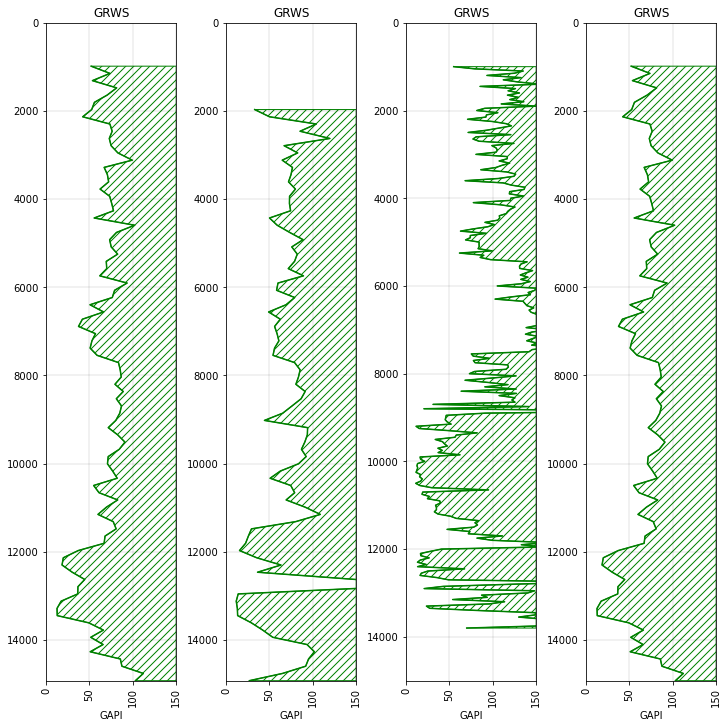

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=4, constrained_layout=True, figsize=(10,10))
segment_GR.plot(ax=axes[0], c="g")
axes[0].set_xlim([0, 150]) #escala registro
axes[0].fill_betweenx(segment_GR.basis, 150, segment_GR, hatch="///", edgecolor='green', facecolor="none")

ax1=axes[1]
segment_GR_2.plot(ax=ax1, c="g")
ax1.set_xlim([0, 150]) #escala registro
ax1.fill_betweenx(segment_GR_2.basis, 150, segment_GR_2, hatch="///", edgecolor='green', facecolor="none")


ax2=axes[2]
segment_GR_3.plot(ax=ax2, c="g")
ax2.set_xlim([0, 150]) #escala registro
ax2.fill_betweenx(segment_GR_3.basis, 150, segment_GR_3, hatch="///", edgecolor='green', facecolor="none")


ax3=axes[3]
segment_GR_4.plot(ax=ax3, c="g")
ax3.set_xlim([0, 150]) #escala registro
ax3.fill_betweenx(segment_GR_4.basis, 150, segment_GR_4, hatch="///", edgecolor='green', facecolor="none")


# Calculating Vshale with GR

In [39]:
log_names = 'GRWS', 'SPWS', 'DTWS', 'RHOBED', 'NPHISSED'

In [40]:
df_logs = df_logs_dvnay[['UWI', 'Depth', 'GRWS', 'SPWS', 'DTWS', 'RHOBED', 'NPHISSED', 'formation']]
df_logs.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation
0,100010107020W500,950.0,NaN,-2.8571,140.0,NaN,NaN,NaN
1,100010107020W500,1000.0,NaN,-12.8579,140.0,NaN,NaN,NaN
2,100010107020W500,1050.0,NaN,-2.0230,NaN,NaN,NaN,NaN
3,100010107020W500,1100.0,NaN,-3.6874,NaN,NaN,NaN,NaN
4,100010107020W500,1150.0,NaN,-3.9643,NaN,NaN,NaN,NaN


In [41]:
df_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247800 entries, 0 to 247799
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UWI        247800 non-null  object 
 1   Depth      247800 non-null  float64
 2   GRWS       64037 non-null   float64
 3   SPWS       64758 non-null   float64
 4   DTWS       54051 non-null   float64
 5   RHOBED     17575 non-null   float64
 6   NPHISSED   7292 non-null    float64
 7   formation  195093 non-null  object 
dtypes: float64(6), object(2)
memory usage: 15.1+ MB


In [42]:
well_717 = df_logs[df_logs['UWI'] == '100100704717W500']
well_717.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2036.1270,0.5155,NaN
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2461.2339,0.1552,NaN
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2266.7410,0.3116,NaN
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2285.7390,0.3353,NaN


In [43]:
well_718 = df_logs[df_logs['UWI'] == '100112504718W500']
well_5718 = df_logs[df_logs['UWI'] == '100110505718W500']

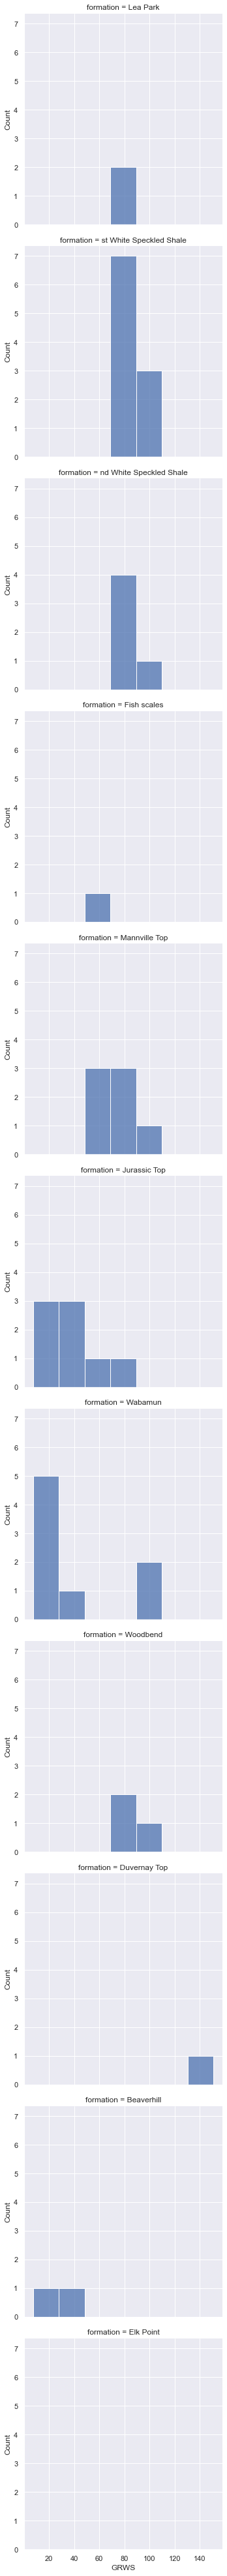

In [153]:
sns.set_theme(style="darkgrid")
sns.displot(well_717, x='GRWS', row='formation')

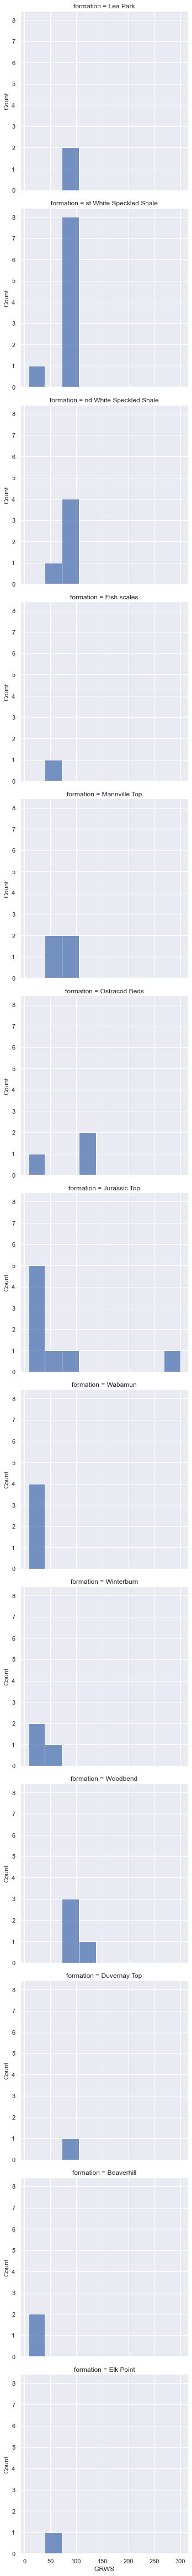

In [154]:
sns.set_theme(style="darkgrid")
sns.displot(data=well_718, x='GRWS', row='formation')

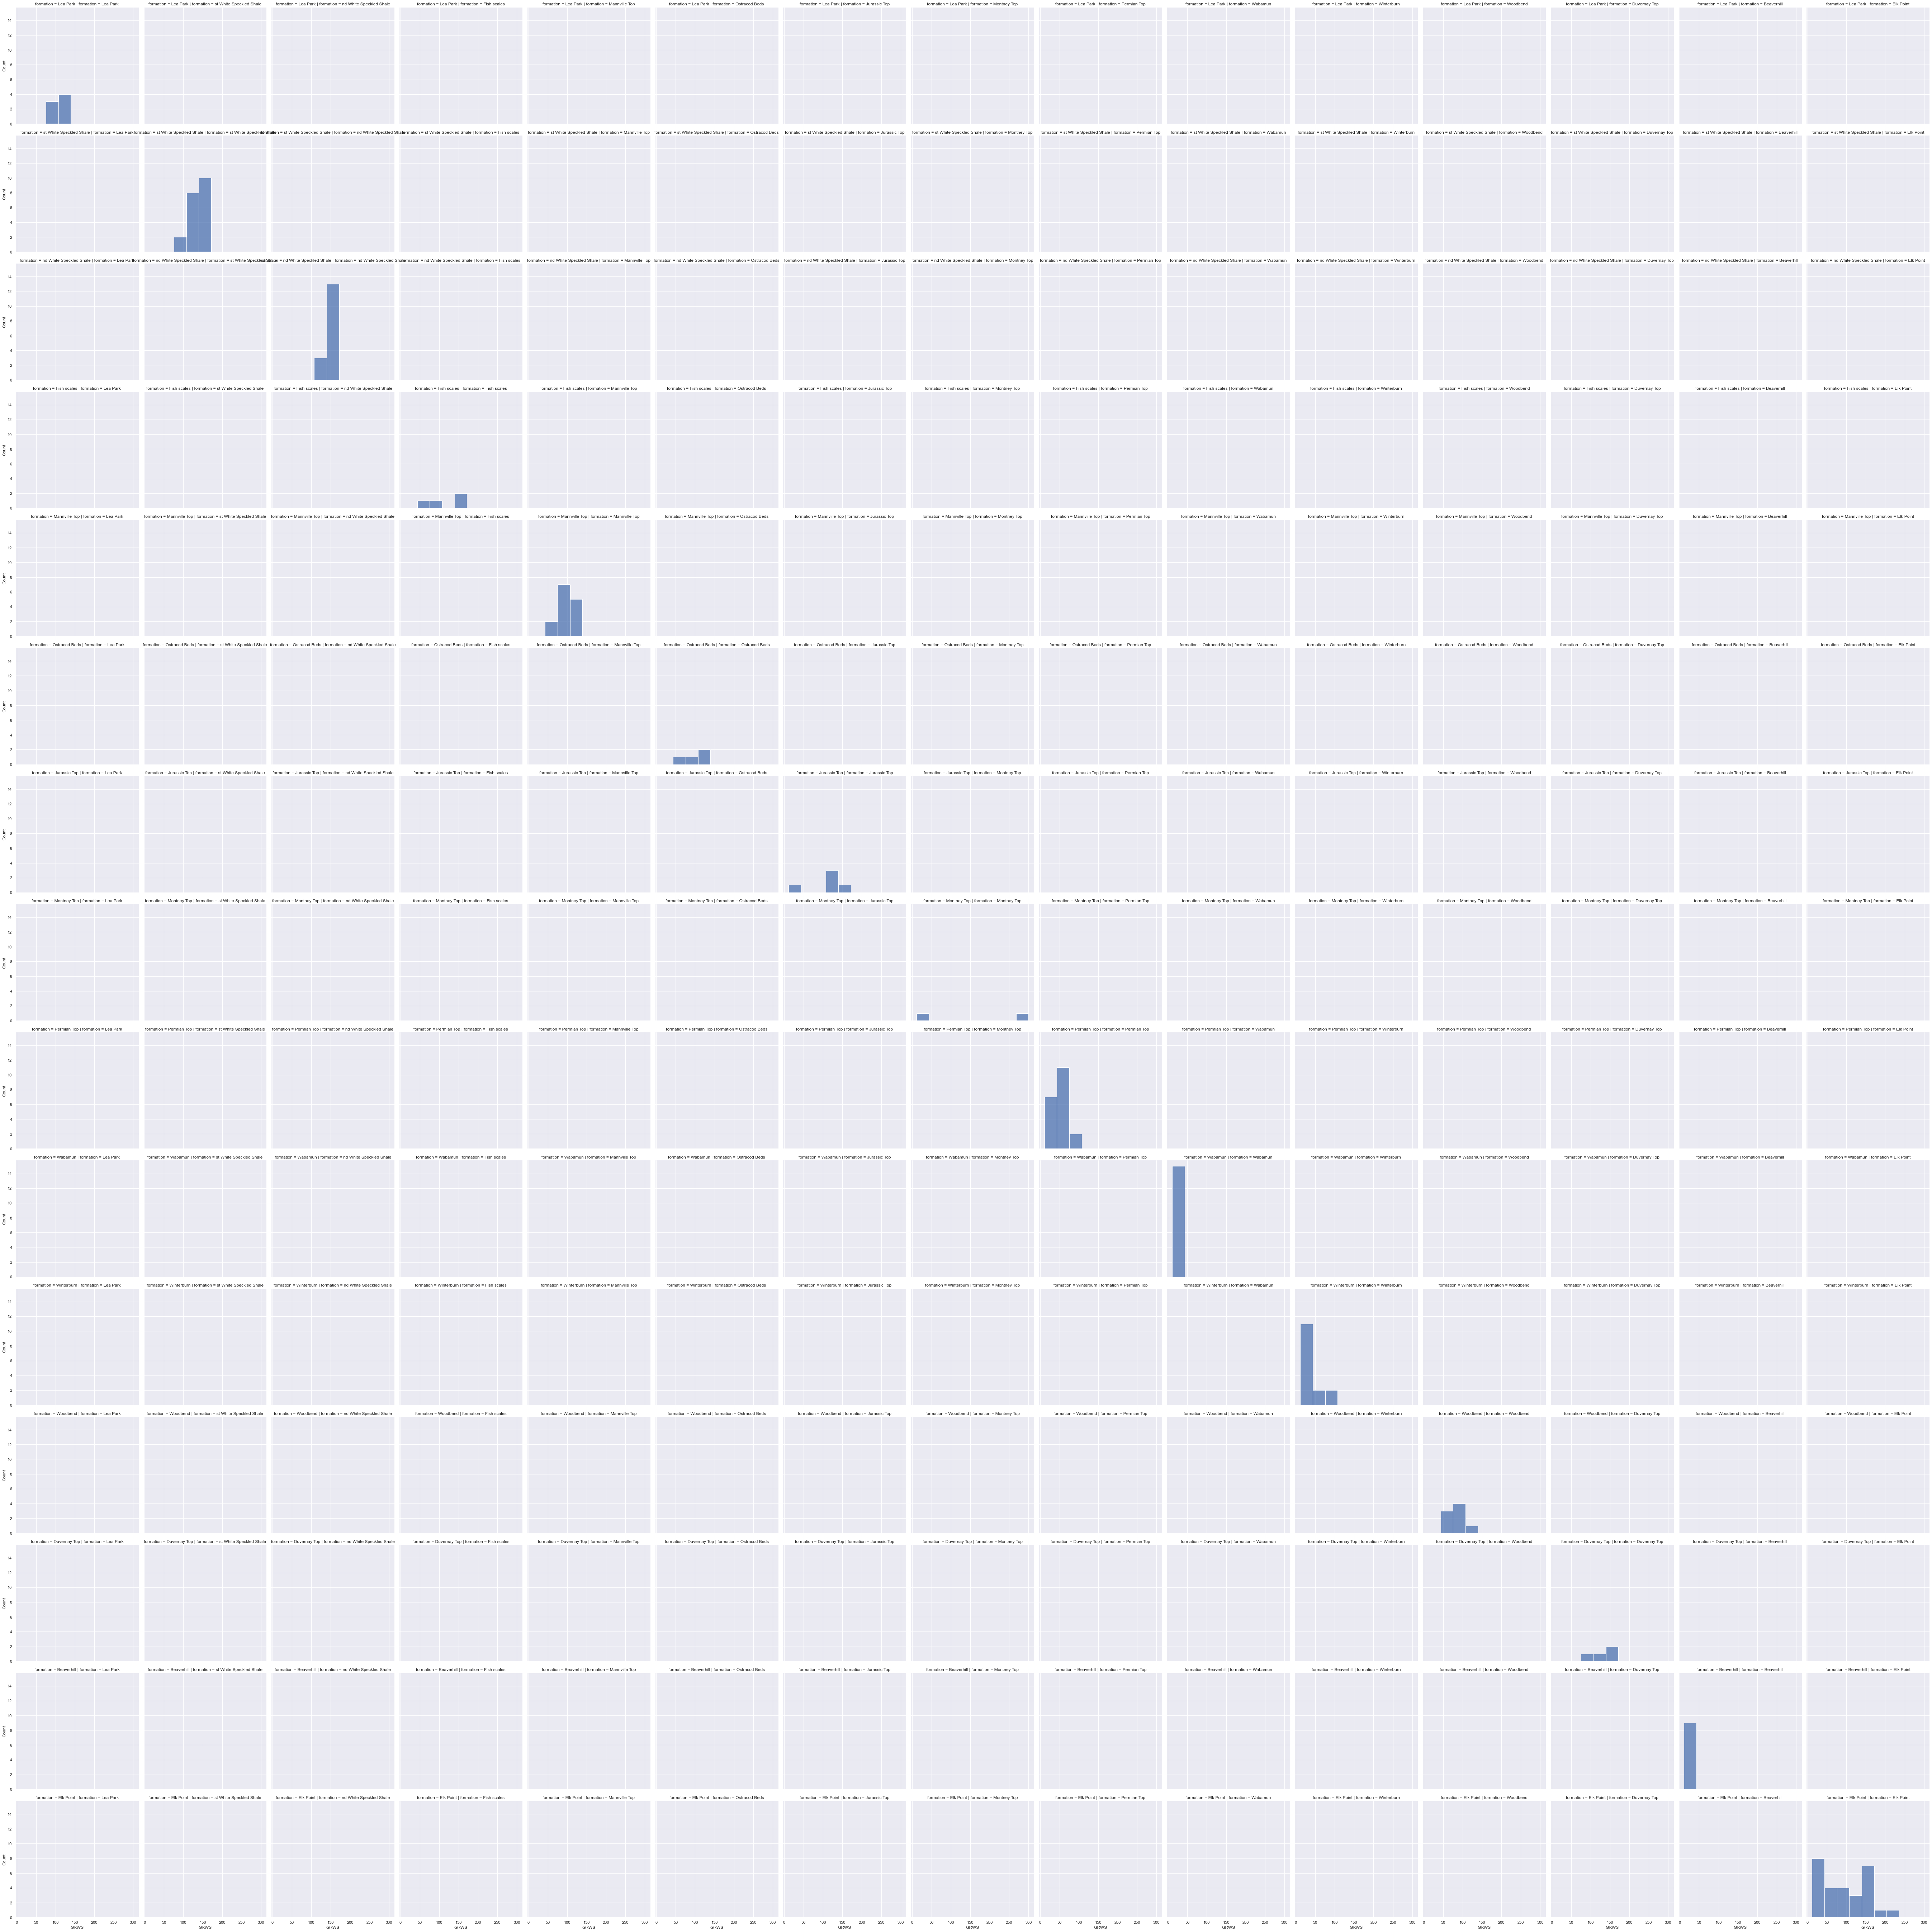

In [155]:
sns.set_theme(style="darkgrid")
sns.displot(data=well_5718, x='GRWS', col= 'formation', row='formation')



In [44]:
GR = well_717['GRWS']

In [45]:
normalized_GR=(GR-GR.min())/(GR.max()-GR.min())

In [46]:
P90 = normalized_GR.quantile(0.9)
P10 = normalized_GR.quantile(0.1)

In [47]:
P10_dnorm = (P10 * (GR.max()-GR.min()))  + GR.min()
P10_dnorm

27.075800000000008

In [48]:
P90_dnorm = (P90 * (GR.max()-GR.min()))  + GR.min()
P90_dnorm

91.4793

In [49]:
GRmin = P10_dnorm
GRmax = P90_dnorm

GRI = (well_717['GRWS'] - GRmin) / (GRmax - GRmin)

In [50]:
well_717['Vshale_v2'] = 0.33 * ((2 ** (2 * GRI)) - 1)
well_717.head()

<ipython-input-50-d2f8420a5f33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_717['Vshale_v2'] = 0.33 * ((2 ** (2 * GRI)) - 1)


,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,Vshale_v2
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.225552
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2036.1270,0.5155,NaN,0.583535
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2461.2339,0.1552,NaN,0.237884
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2266.7410,0.3116,NaN,0.742548
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2285.7390,0.3353,NaN,0.522380


In [51]:
well_717['Vshale_v3'] = 1.7 - ( (3.38 - ((GRI+ 0.7) ** 2) ) ** 0.5)
well_717.head()

<ipython-input-51-6643f1c17d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_717['Vshale_v3'] = 1.7 - ( (3.38 - ((GRI+ 0.7) ** 2) ) ** 0.5)


,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,Vshale_v2,Vshale_v3
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.225552,0.209091
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2036.1270,0.5155,NaN,0.583535,0.550123
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2461.2339,0.1552,NaN,0.237884,0.220647
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2266.7410,0.3116,NaN,0.742548,0.711709
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2285.7390,0.3353,NaN,0.522380,0.490406


In [184]:
SP = well_717['SPWS']

In [185]:
normalized_SP=(SP-SP.min())/(SP.max()-SP.min())

In [186]:
P90_sp = normalized_SP.quantile(0.9)
P10_sp = normalized_SP.quantile(0.1)

In [187]:
P10_dnorm_sp = (P10_sp * (SP.max()-SP.min()))  + SP.min()
P10_dnorm_sp

-63.46786

In [189]:
P90_dnorm_sp = (P90_sp * (SP.max()-SP.min()))  + SP.min()
P90_dnorm_sp

-6.58802

In [192]:
SSL = P10_dnorm_sp
SHL = P90_dnorm_sp
well_717['Vshale_v1'] = 1- ((SP - SHL) / (SSL-SHL))
#with SHL = shale line and SSL = sandstone line to be defined from the dataset

<ipython-input-192-aa6c86433c1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_717['Vshale_v1'] = 1- ((SP - SHL) / (SSL-SHL))


In [223]:
well_717.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,GR_Index_v2,Vshale_v2,Vshale_v3,Vshale_v1,Vshale,Porosity_density_log,Porosity_sonic_log
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.375728,0.225552,0.209091,NaN,0.217322,NaN,NaN
138729,100100704717W500,984.251968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138730,100100704717W500,1148.293963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2.036127,0.5155,NaN,0.734497,0.583535,0.550123,0.846482,0.566829,0.395267,-20.889367
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2.461234,0.1552,NaN,0.391566,0.237884,0.220647,0.968253,0.229266,0.120650,-8.529330


In [52]:
vshale_col2 = 'Vshale_v2'
vshale_col3 = 'Vshale_v3'
vshale_col1 = 'Vshale_v1'

well_717 = well_717.rename(columns={'Vshale_v1': vshale_col1 , 'Vshale_v2': vshale_col2 , 'Vshale_v3': vshale_col3 })


In [53]:
well_717['Vshale'] = (well_717['Vshale_v2'] + well_717['Vshale_v3']) / 2
well_717.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,Vshale_v2,Vshale_v3,Vshale
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.225552,0.209091,0.217322
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2036.1270,0.5155,NaN,0.583535,0.550123,0.566829
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2461.2339,0.1552,NaN,0.237884,0.220647,0.229266
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2266.7410,0.3116,NaN,0.742548,0.711709,0.727128
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2285.7390,0.3353,NaN,0.522380,0.490406,0.506393


(-0.11455040502109572, 4.428444959705266)

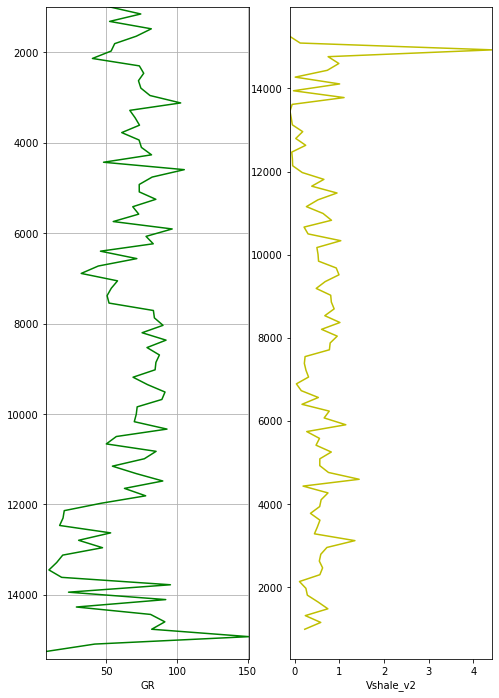

In [75]:
# def make_log_plot(logs):
# logs = well_717.sort_values(by='Depth')
ztop = well_717.Depth.min(); zbot=well_717.Depth.max()

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 12))
ax[0].plot(well_717['GRWS'], well_717.Depth, '-g')
ax[1].plot(well_717[vshale_col2],  well_717.Depth, 'y')
# ax[2].plot(well_717[vshale_col3],  well_717.Depth, '-y')


for i in range(len(ax)-1):
    ax[i].set_ylim(ztop, zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=3)
ax[0].set_xlabel('GR')
ax[0].set_xlim(well_717['GRWS'].min(), well_717['GRWS'].max())
ax[1].set_xlabel('Vshale_v2')
ax[1].set_xlim(well_717[vshale_col2].min(), well_717[vshale_col2].max())
# ax[2].set_xlabel('Vshale_v3')
# ax[2].set_xlim(well_717[vshale_col3].min(), well_717[vshale_col3].max())

# Calculating porosity

In [55]:
well_717['RHOBED'] = well_717['RHOBED'] / 1000
well_717.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,Vshale_v2,Vshale_v3,Vshale
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.225552,0.209091,0.217322
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2.036127,0.5155,NaN,0.583535,0.550123,0.566829
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2.461234,0.1552,NaN,0.237884,0.220647,0.229266
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2.266741,0.3116,NaN,0.742548,0.711709,0.727128
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2.285739,0.3353,NaN,0.522380,0.490406,0.506393


In [56]:
rhom = 2.648
rhof = 1.1
well_717['Porosity_density_log'] = ((rhom - well_717['RHOBED']) / (rhom - rhof)) + (0.0336 * well_717['Vshale'])
well_717.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,Vshale_v2,Vshale_v3,Vshale,Porosity_density_log
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.225552,0.209091,0.217322,NaN
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2.036127,0.5155,NaN,0.583535,0.550123,0.566829,0.414312
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2.461234,0.1552,NaN,0.237884,0.220647,0.229266,0.128353
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2.266741,0.3116,NaN,0.742548,0.711709,0.727128,0.270723
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2.285739,0.3353,NaN,0.522380,0.490406,0.506393,0.251034


In [57]:
well_717['Porosity_sonic_log'] =  ((well_717['DTWS']- 177)/430)-(0.1977 * well_717['Vshale'])

In [58]:
well_717['Total_porosity'] = (well_717['Porosity_sonic_log'] + well_717['Porosity_density_log']) / 2
well_717.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,Vshale_v2,Vshale_v3,Vshale,Porosity_density_log,Porosity_sonic_log,Total_porosity
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.225552,0.209091,0.217322,NaN,NaN,NaN
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2.036127,0.5155,NaN,0.583535,0.550123,0.566829,0.414312,0.326791,0.370552
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2.461234,0.1552,NaN,0.237884,0.220647,0.229266,0.128353,0.120021,0.124187
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2.266741,0.3116,NaN,0.742548,0.711709,0.727128,0.270723,0.111363,0.191043
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2.285739,0.3353,NaN,0.522380,0.490406,0.506393,0.251034,0.243640,0.247337


(-0.20612286193300558, 0.444687463366021)

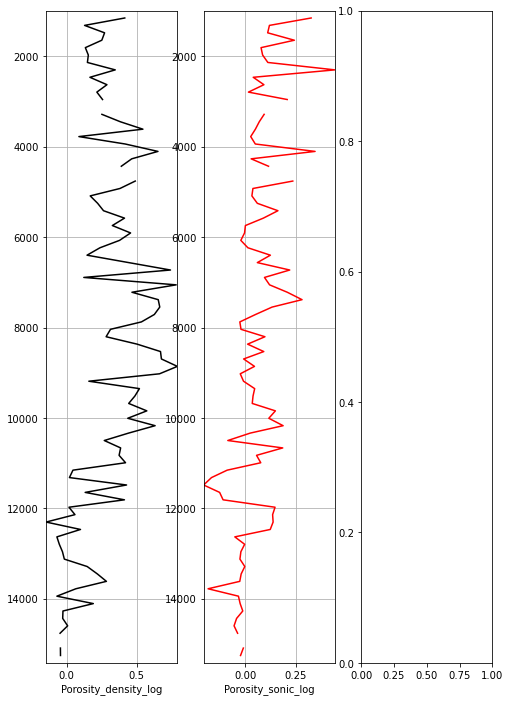

In [92]:
logs = well_717.sort_values(by='Depth')
ztop = well_717.Depth.min(); zbot=well_717.Depth.max()

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 12))
ax[0].plot(well_717['Porosity_density_log'], well_717.Depth, color='black')
ax[1].plot(well_717['Porosity_sonic_log'],  well_717.Depth, color='red')

for i in range(len(ax)-1):
    ax[i].set_ylim(ztop, zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=3)
ax[0].set_xlabel('Porosity_density_log')
ax[0].set_xlim(well_717['Porosity_density_log'].min(), well_717['Porosity_density_log'].max())
ax[1].set_xlabel('Porosity_sonic_log')
ax[1].set_xlim(well_717['Porosity_sonic_log'].min(), well_717['Porosity_sonic_log'].max())


In [60]:
well_717['Effective_porosity'] = well_717['Porosity_density_log'] * (1-well_717['Vshale'] )
well_717.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,Vshale_v2,Vshale_v3,Vshale,Porosity_density_log,Porosity_sonic_log,Total_porosity,Effective_porosity
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.225552,0.209091,0.217322,NaN,NaN,NaN,NaN
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2.036127,0.5155,NaN,0.583535,0.550123,0.566829,0.414312,0.326791,0.370552,0.179468
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2.461234,0.1552,NaN,0.237884,0.220647,0.229266,0.128353,0.120021,0.124187,0.098926
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2.266741,0.3116,NaN,0.742548,0.711709,0.727128,0.270723,0.111363,0.191043,0.073873
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2.285739,0.3353,NaN,0.522380,0.490406,0.506393,0.251034,0.243640,0.247337,0.123912


In [61]:
well_717['Effective_porosity'].min()

-0.15267566262117999

In [62]:
well_717['Effective_porosity'].max()

0.634615334898871

In [63]:
pi_sand = 1 - well_717['Vshale'] - well_717['Total_porosity']
pi_shale = well_717['Vshale']
pi_water = well_717['Total_porosity']

well_717['K_geometric'] = (2.6 ** pi_shale) * (0.604 ** pi_water) * (7.1 ** pi_sand)

In [64]:
well_717['K_square_root_mean'] =  pi_shale * (2.6**  0.5) + pi_water * (0.604 ** 0.5) + pi_sand * (7.1 ** 0.5)
well_717.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,Vshale_v2,Vshale_v3,Vshale,Porosity_density_log,Porosity_sonic_log,Total_porosity,Effective_porosity,K_geometric,K_square_root_mean
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.225552,0.209091,0.217322,NaN,NaN,NaN,NaN,NaN,NaN
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2.036127,0.5155,NaN,0.583535,0.550123,0.566829,0.414312,0.326791,0.370552,0.179468,1.612081,1.368821
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2.461234,0.1552,NaN,0.237884,0.220647,0.229266,0.128353,0.120021,0.124187,0.098926,4.152652,2.188973
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2.266741,0.3116,NaN,0.742548,0.711709,0.727128,0.270723,0.111363,0.191043,0.073873,2.135821,1.538972
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2.285739,0.3353,NaN,0.522380,0.490406,0.506393,0.251034,0.243640,0.247337,0.123912,2.320714,1.664965


In [65]:
well_717['Thermal_conductivity'] = (well_717['K_geometric'] + well_717['K_square_root_mean']) / 2
well_717.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,Vshale_v2,Vshale_v3,Vshale,Porosity_density_log,Porosity_sonic_log,Total_porosity,Effective_porosity,K_geometric,K_square_root_mean,Thermal_conductivity
138640,100100704717W500,984.251968,51.274,NaN,NaN,NaN,NaN,NaN,0.225552,0.209091,0.217322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138641,100100704717W500,1148.293963,74.380,-15.3201,365.707,2.036127,0.5155,NaN,0.583535,0.550123,0.566829,0.414312,0.326791,0.370552,0.179468,1.612081,1.368821,1.490451
138642,100100704717W500,1312.335958,52.294,-8.3938,248.099,2.461234,0.1552,NaN,0.237884,0.220647,0.229266,0.128353,0.120021,0.124187,0.098926,4.152652,2.188973,3.170813
138643,100100704717W500,1476.377953,81.835,-6.5925,286.700,2.266741,0.3116,NaN,0.742548,0.711709,0.727128,0.270723,0.111363,0.191043,0.073873,2.135821,1.538972,1.837397
138644,100100704717W500,1640.419948,71.161,-6.5813,324.814,2.285739,0.3353,NaN,0.522380,0.490406,0.506393,0.251034,0.243640,0.247337,0.123912,2.320714,1.664965,1.992840


(1.0762078092658853, 5.70031990400142)

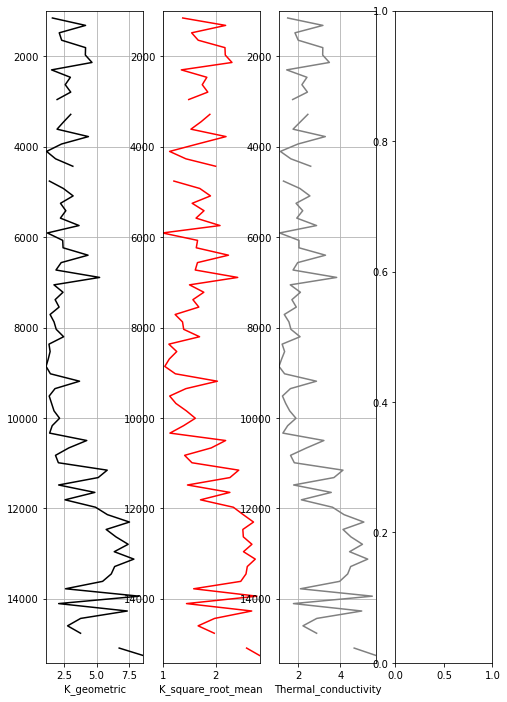

In [90]:
logs = well_717.sort_values(by='Depth')
ztop = well_717.Depth.min(); zbot=well_717.Depth.max()

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 12))
ax[0].plot(well_717['K_geometric'], well_717.Depth, color='black')
ax[1].plot(well_717['K_square_root_mean'],  well_717.Depth, color='red')
ax[2].plot(well_717['Thermal_conductivity'],  well_717.Depth, color='gray')

for i in range(len(ax)-1):
    ax[i].set_ylim(ztop, zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=3)
ax[0].set_xlabel('K_geometric')
ax[0].set_xlim(well_717['K_geometric'].min(), well_717['K_geometric'].max())
ax[1].set_xlabel('K_square_root_mean')
ax[1].set_xlim(well_717['K_square_root_mean'].min(), well_717['K_square_root_mean'].max())
ax[2].set_xlabel('Thermal_conductivity')
ax[2].set_xlim(well_717['Thermal_conductivity'].min(), well_717['Thermal_conductivity'].max())

# Automatize thermal conductivity calculation

In [ ]:
df_logs_dvnay

In [108]:
# well_final = pd.DataFrame(columns=['UWI', 'Depth', 'GRWS', 'vshale1', 'vshale2', 'vshale'])
wells = pd.DataFrame()
for wellname in df_logs_dvnay['UWI'].unique():
    well = df_logs_dvnay[df_logs_dvnay['UWI'] == wellname]
    well = well[['UWI', 'Depth', 'GRWS', 'SPWS', 'DTWS', 'RHOBED', 'NPHISSED', 'formation']]
    # depth = well['Depth']
    # Subsetting GR log
    GR = well['GRWS']
    # Normalizing GR log
    normalized_GR=(GR-GR.min())/(GR.max()-GR.min())
    # Calculating P10 y P90
    P90 = normalized_GR.quantile(0.9)
    P10 = normalized_GR.quantile(0.1)
    # Denormalizing GR log
    P10_dnorm = (P10 * (GR.max()-GR.min()))  + GR.min()
    P90_dnorm = (P90 * (GR.max()-GR.min()))  + GR.min()
    # Assigning GRmin y GRmax according P10 and P90
    GRmin = P10_dnorm
    GRmax = P90_dnorm
    #Calculating Gamma Ray Index
    GRI = (GR - GRmin) / (GRmax - GRmin)
    # Calculating vshale with Larionov method eq 2.2
    well['vshale1'] = 0.33 * ((2 ** (2 * GRI)) - 1)
    # Calculating vshale with equation 2.1
    well['vshale2'] = 1.7 - ( (3.38 - ((GRI+ 0.7) ** 2) ) ** 0.5)
    # Calculating vshale
    well['vshale'] = (well['vshale1'] + well['vshale2']) / 2
    wells = wells.append(well)
    # well = well_final.append({'UWI': wellname, 'Depth': depth, 'GRWS': GR,
                              # 'vshale1': vshale1, 'vshale2': vshale2, 'vshale': vshale}, ignore_index=True)



In [109]:
wells.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,vshale1,vshale2,vshale
0,100010107020W500,950.0,NaN,-2.8571,140.0,NaN,NaN,NaN,NaN,NaN,NaN
1,100010107020W500,1000.0,NaN,-12.8579,140.0,NaN,NaN,NaN,NaN,NaN,NaN
2,100010107020W500,1050.0,NaN,-2.0230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100010107020W500,1100.0,NaN,-3.6874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100010107020W500,1150.0,NaN,-3.9643,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
wells[wells['UWI'] == '100112504718W500']


,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,vshale1,vshale2,vshale
218958,100112504718W500,1968.503937,32.1706,NaN,NaN,NaN,NaN,NaN,0.065660,0.059997,0.062829
218959,100112504718W500,2132.545932,46.3785,-20.3738,243.9489,2507.4939,0.1684,NaN,0.191746,0.177439,0.184592
218960,100112504718W500,2296.587927,105.5650,-1.6874,362.0869,2083.3440,0.4991,NaN,1.321649,NaN,NaN
218961,100112504718W500,2460.629921,82.2236,-1.0199,272.2521,2304.5396,0.3196,NaN,0.718460,0.686465,0.702462
218962,100112504718W500,2624.671916,124.1990,-0.9134,371.4292,2044.4133,0.4740,NaN,2.043996,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
219117,100112504718W500,14599.737530,NaN,NaN,NaN,NaN,NaN,Woodbend,NaN,NaN,NaN
219118,100112504718W500,14763.779530,NaN,NaN,NaN,NaN,NaN,Duvernay Top,NaN,NaN,NaN
219119,100112504718W500,14927.821520,NaN,NaN,NaN,NaN,NaN,Beaverhill,NaN,NaN,NaN
219120,100112504718W500,15091.863520,NaN,NaN,NaN,NaN,NaN,Beaverhill,NaN,NaN,NaN


In [113]:
for wellname in wells['UWI'].unique():
    well = wells[wells['UWI'] == wellname]
    # Subsetting RHOB log
    RHOB = well['RHOBED']
    # RHOB log
    RHOB = RHOB / 1000
    # Calculating total porosity with RHOB log
    well['porosity_density_log'] = ((2.648 - RHOB) / 1.548) + (0.0336 * well['vshale'])
    # Subsetting Sonic log
    DT = well['DTWS']
    # Calculating total porosity with sonic log
    well['porosity_sonic_log'] =  ((DT- 177)/430)-(0.1977 * well['vshale'])
    # Averaging total porosity
    well['total_porosity'] = (well['porosity_sonic_log'] + well['porosity_density_log']) / 2
    # Calculating effective porosity
    well['effective_porosity'] = well['porosity_density_log'] * (1-well['vshale'] )
    wells = wells.append(well)

<ipython-input-113-af01ab322b4a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['porosity_density_log'] = ((2.648 - RHOB) / 1.548) + (0.0336 * well['vshale'])
<ipython-input-113-af01ab322b4a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['porosity_sonic_log'] =  ((DT- 177)/430)-(0.1977 * well['vshale'])
<ipython-input-113-af01ab322b4a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [114]:
wells.head()

,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,vshale1,vshale2,vshale,porosity_density_log,porosity_sonic_log,total_porosity,effective_porosity
0,100010107020W500,950.0,NaN,-2.8571,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100010107020W500,1000.0,NaN,-12.8579,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100010107020W500,1050.0,NaN,-2.0230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100010107020W500,1100.0,NaN,-3.6874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100010107020W500,1150.0,NaN,-3.9643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
for wellname in wells['UWI'].unique():
    well =wells[wells['UWI'] == wellname]
    # Calculate volume of each component (Pi)
    pi_sand = 1 - well['vshale'] - well['total_porosity']
    pi_shale = well['vshale']
    pi_water = well['total_porosity']
    # Calculate k geometric
    well['k_geometric'] = (2.6 ** pi_shale) * (0.604 ** pi_water) * (7.1 ** pi_sand)
    # Calculate k value using square root mean
    well['k_square_root_mean'] =  pi_shale * (2.6**  0.5) + pi_water * (0.604 ** 0.5) + pi_sand * (7.1 ** 0.5)
    # Calculate thermal conductivity
    well['thermal_conductivity'] = (well['k_geometric'] + well['k_square_root_mean']) / 2
    wells = wells.append(well)

<ipython-input-116-d7f081f7f507>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['k_geometric'] = (2.6 ** pi_shale) * (0.604 ** pi_water) * (7.1 ** pi_sand)
<ipython-input-116-d7f081f7f507>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['k_square_root_mean'] =  pi_shale * (2.6**  0.5) + pi_water * (0.604 ** 0.5) + pi_sand * (7.1 ** 0.5)
<ipython-input-116-d7f081f7f507>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [117]:
wells.head()





,UWI,Depth,GRWS,SPWS,DTWS,RHOBED,NPHISSED,formation,vshale1,vshale2,vshale,porosity_density_log,porosity_sonic_log,total_porosity,effective_porosity,k_geometric,k_square_root_mean,thermal_conductivity
0,100010107020W500,950.0,NaN,-2.8571,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100010107020W500,1000.0,NaN,-12.8579,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100010107020W500,1050.0,NaN,-2.0230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100010107020W500,1100.0,NaN,-3.6874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100010107020W500,1150.0,NaN,-3.9643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
